*creating by khaled elz3blawy*

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss

In [21]:
#load breast cancer data

BreastData = load_breast_cancer()
#X Data
X = BreastData.data
#y Data 
y = BreastData.target


In [23]:
#Splitting data
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.33, random_state=44, shuffle =True)


In [30]:
#Applying LogisticRegression Model 

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''
LogisticRegressionModel = LogisticRegression(penalty='l1',solver='liblinear',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train,y_train)
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.9606299212598425
LogisticRegressionModel Test Score is :  0.9680851063829787
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [91]
----------------------------------------------------


#Calculating Prediction


In [33]:
y_pred =LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0 0 1 0 1 1 1 1 0 1]
Prediction Probabilities Value for LogisticRegressionModel is :  [[9.92356891e-01 7.64310921e-03]
 [9.99999996e-01 4.06213706e-09]
 [2.18923277e-02 9.78107672e-01]
 [1.00000000e+00 1.67907096e-10]
 [3.05823485e-01 6.94176515e-01]
 [9.79896474e-02 9.02010353e-01]
 [1.83458858e-04 9.99816541e-01]
 [7.21203683e-02 9.27879632e-01]
 [9.97731306e-01 2.26869377e-03]
 [1.04601572e-03 9.98953984e-01]]


Calculating Confusion Matrix


Confusion Matrix is : 
 [[ 65   3]
 [  3 117]]


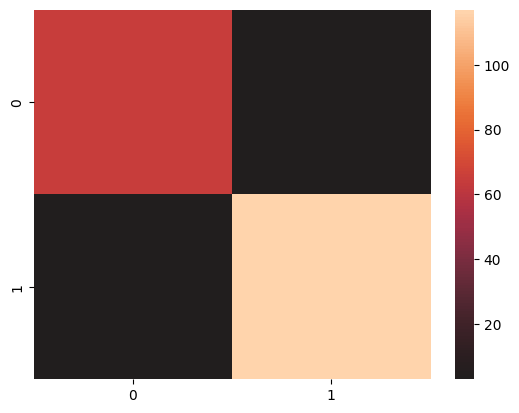

In [36]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))


In [39]:

AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)


Accuracy Score is :  0.9680851063829787


In [45]:
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)
print("__________________________________________________________________________________")
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)
print("__________________________________________________________________________________")
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)
print("__________________________________________________________________________________")
PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

print("__________________________________________________________________________________")

#Calculating Precision recall Curve :  
# precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)
print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

print("__________________________________________________________________________________")

#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

print("__________________________________________________________________________________")
#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

print("__________________________________________________________________________________")

#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

print("__________________________________________________________________________________")
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

print("__________________________________________________________________________________")
#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)

ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )

F1 Score is :  0.9680851063829787
__________________________________________________________________________________
Recall Score is :  0.9680851063829787
__________________________________________________________________________________
Precision Score is :  0.9680851063829787
__________________________________________________________________________________
Precision Recall Score is :  (0.9680851063829787, 0.9680851063829787, 0.9680851063829787, None)
__________________________________________________________________________________
Precision Value is :  [0.63829787 0.975      1.        ]
Recall Value is :  [1.    0.975 0.   ]
Thresholds Value is :  [0 1]
__________________________________________________________________________________
Classification Report is :                precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.97      0.97      0.97       120

    accuracy                           0.97       188
   ma